[View in Colaboratory](https://colab.research.google.com/github/johanjan/MOOC-HPFEM-source/blob/master/MOOC_HPFEM_Adaptivity.ipynb)

### MOOC-HPFEM: Navier-Stokes fluid flow Direct FEM Simulation (DFS)



<p>Incompressible Navier-Stokes as model for low and high Reynolds number flow, such as blood flow and flight: <span class="math display">\begin{array}{rcll} 
R(\hat{u}) &;=&
\begin{cases}
  p_t u + (u\cdot \nabla) u + \nabla p - \nu \Delta u = 0\\
  \nabla \cdot u = 0
\end{cases}\\
u &;=& 0, x \in \Gamma \quad (\text{No-slip BC for low Reynolds number})\\
\hat{u} &=& (u, p), \quad r(\hat{u}, \hat{v}) = (R(\hat{u}), \hat{v}) \quad (\text{Weak residual})
\end{array}</span></p>
<dl>
<dt>Space-time cG(1)cG(1) FEM with GLS stabilization. Developed over 20+ years by Johnson, Hoffman, Jansson, etc.</dt>
<dd><p><span class="math display">\begin{aligned}
  &r(\hat{U}, \hat{v}) = (R(\hat{U}), \hat{v}) + (\delta R(\hat{U}), R(\hat{v})) = 0\\
  &\delta = h, \, \forall \hat{v} \in \hat{V}_h, \, \hat{U} \in \hat{V}_h\end{aligned}</span></p>
</dd>

### FEniCS DFS formulation to run and modify yourself

In [0]:
#@title
# Setup system environment and define utility functions and variables
from google.colab import files
try:
    from dolfin import *; from mshr import *
except ImportError as e:
    !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
    !add-apt-repository -y ppa:fenics-packages/fenics
    !apt-get update -qq
    !sed -e 's:artful:bionic:' /etc/apt/sources.list.d/fenics-packages-ubuntu-fenics-artful.list > temp
    !mv temp /etc/apt/sources.list.d/fenics-packages-ubuntu-fenics-artful.list
    !sed -e 's:artful:bionic:' /etc/apt/sources.list > temp
    !mv temp /etc/apt/sources.list
    !apt-get update -qq
    !apt install -y --no-install-recommends fenics    
    from dolfin import *; from mshr import *
    
import matplotlib.pyplot as plt;
from IPython.display import clear_output, display, update_display; import time; import dolfin.common.plotting as fenicsplot 
import time
from ufl import replace

def plot_compact(u, t, stepcounter, QQ, pl, ax, label = "Velocity", clear = True): # Compact plot utility function
  if stepcounter == 0:
    pl, ax = plt.subplots(); display(pl);
    if clear:
      clear_output(); # Plotting setup
  if stepcounter % 5 == 0:
    uEuclidnorm = project(sqrt(inner(u, u)), QQ); ax.cla(); fig = plt.gcf(); fig.set_size_inches(16, 4)
    plt.subplot(1, 2, 1); pp = plot(uEuclidnorm, cmap="coolwarm"); plt.title("%s at t=%f" % (label, t)) # Plot norm of velocity
    if t == 0.: plt.axis(G); plt.colorbar(pp, shrink=0.5); 
    plt.subplot(1, 2, 2);
    if t == 0.: plot(Q.mesh()); plt.title("Mesh") # Plot mesh
    plt.tight_layout(); dpl = display(pl, display_id="test");
  
  return (pl, ax)

def plot_compact_static(u, QQ, label = "Velocity"): # Compact plot utility function
  pl, ax = plt.subplots();
  uEuclidnorm = project(sqrt(inner(u, u)), QQ); ax.cla(); fig = plt.gcf(); fig.set_size_inches(16, 4)
  plt.subplot(1, 2, 1); pp = plot(uEuclidnorm, cmap="coolwarm"); plt.title("%s" % (label)) # Plot norm of velocity
  plt.axis(G); plt.colorbar(pp, shrink=0.5); 
  plt.subplot(1, 2, 2);
  plot(Q.mesh()); plt.title("Mesh") # Plot mesh
  plt.tight_layout(); dpl = display(pl, display_id="test");
  
  return (pl, ax)

XMIN = 0.; XMAX = 2.5; YMIN = 0; YMAX = 0.41; G = [XMIN, XMAX, YMIN, YMAX]; eps = 1e-5; mresolution=10 # Geometry and mesh
ghole = [0.15, 0.25, 0.15, 0.25];
mesh = generate_mesh(Rectangle(Point(G[0], G[2]), Point(G[1], G[3])) - Rectangle(Point(ghole[0],ghole[2]),Point(ghole[1],ghole[3]) ), mresolution)

stepcounter = 0; pl = None; ax = None

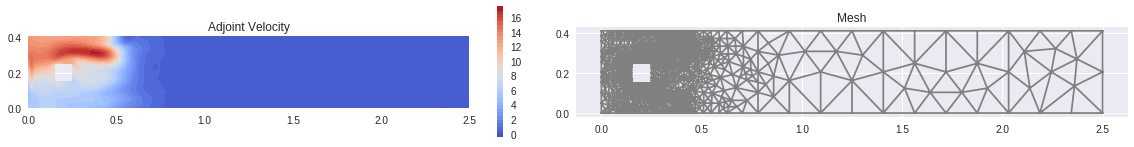

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
adaptive iter: 0 num_vertices: 69 output: 1.495547 err: 1.367478
Calling FFC just-in-time (JIT) compiler, this may take some time.
adaptive iter: 1 num_vertices: 74 output: 1.693476 err: 1.565407
adaptive iter: 2 num_vertices: 85 output: 1.795762 err: 1.667693
adaptive iter: 3 num_vertices: 95 output: 1.827575 err: 1.699506
adaptive iter: 4 num_vertices: 107 output: 1.997068 err: 1.868999
adaptive iter: 5 num_vertices: 121 output: 1.884002 err: 1.755933
adaptive iter: 6 num_vertices: 134 output: 2.108026 err: 1.979957
adaptive iter: 7 num_vertices: 156 output: 2.301173 err: 2.173104
adaptive iter: 8 num_vertices: 187 output: 2.556641 err: 2.428572
adaptive iter: 9 num_vertices: 224 output: 2.550213 err: 2.422144


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


adaptive iter: 10 num_vertices: 261 output: 2.580971 err: 2.452902
adaptive iter: 11 num_vertices: 305 output: 2.451938 err: 2.323869
adaptive iter: 12 num_vertices: 364 output: 2.470584 err: 2.342515
adaptive iter: 13 num_vertices: 438 output: 2.448988 err: 2.320919
adaptive iter: 14 num_vertices: 532 output: 2.469122 err: 2.341053
adaptive iter: 15 num_vertices: 655 output: 2.455311 err: 2.327242
adaptive iter: 16 num_vertices: 803 output: 2.454105 err: 2.326036
adaptive iter: 17 num_vertices: 970 output: 2.462582 err: 2.334513
adaptive iter: 18 num_vertices: 1179 output: 2.466505 err: 2.338436
adaptive iter: 19 num_vertices: 1419 output: 2.473259 err: 2.345190


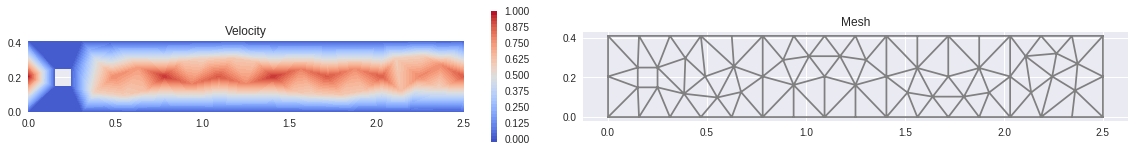

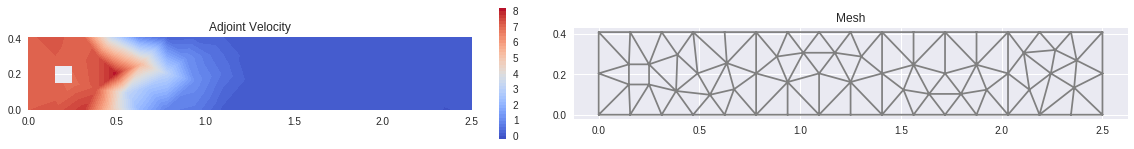

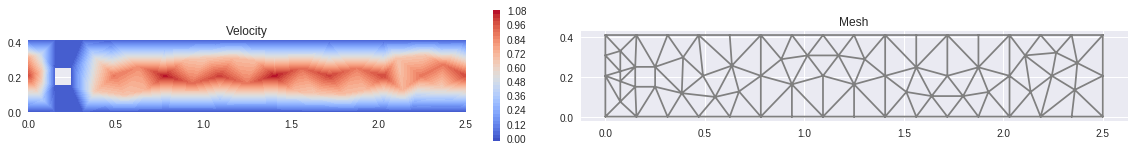

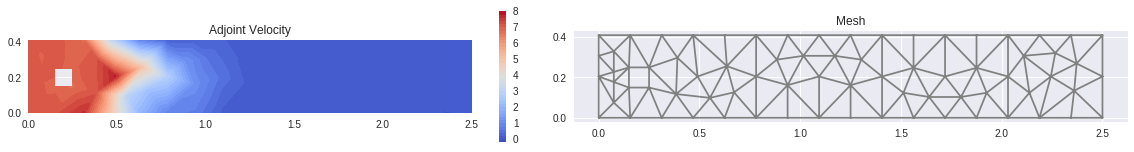

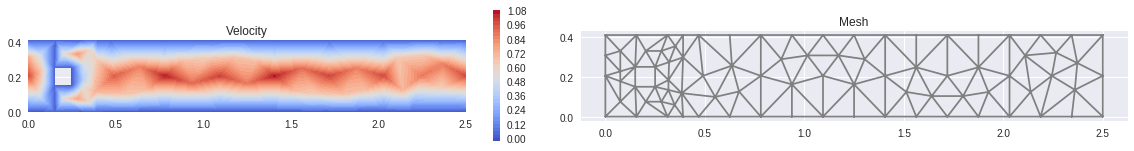

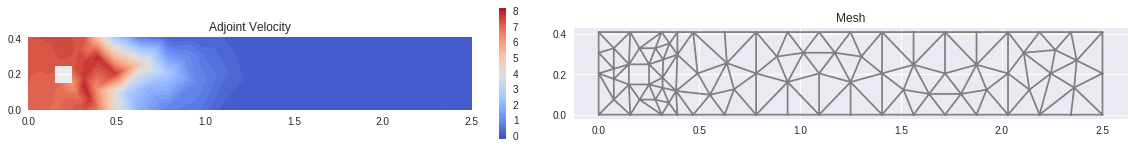

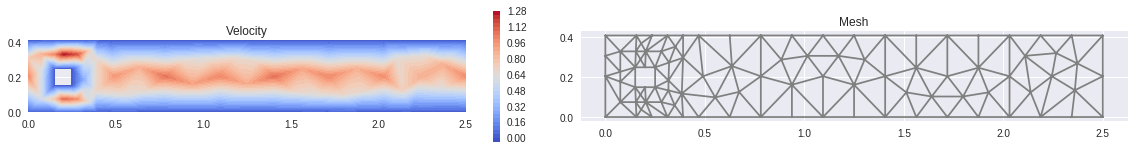

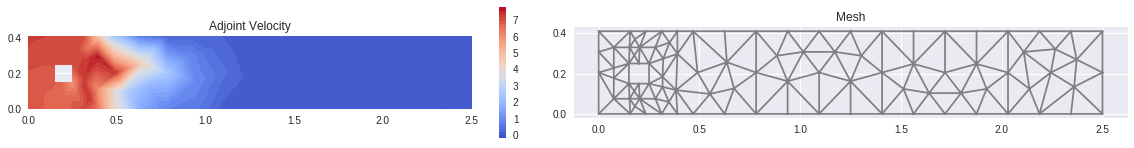

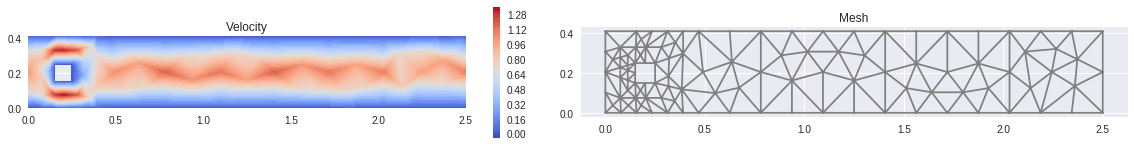

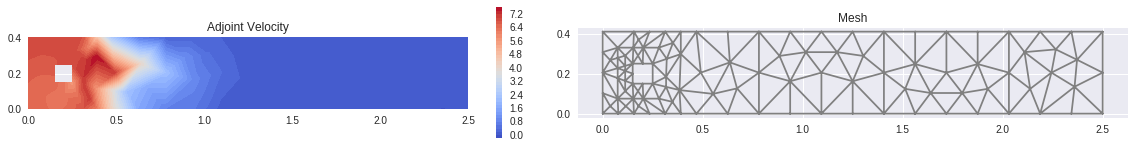

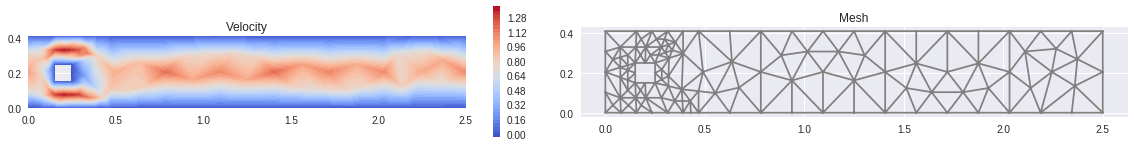

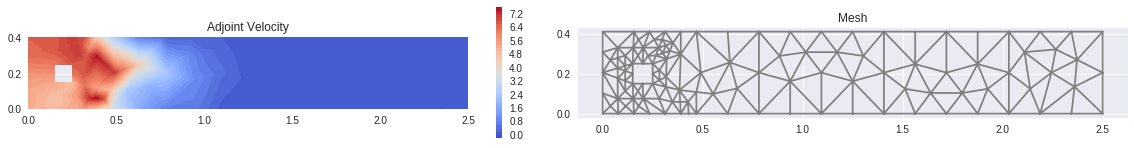

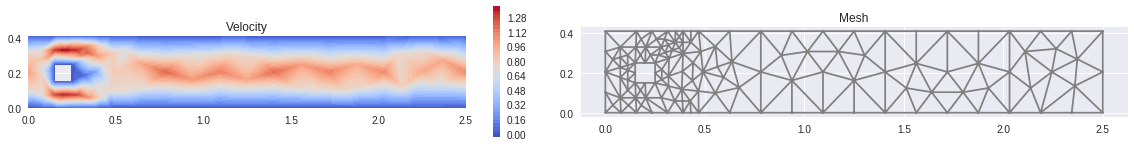

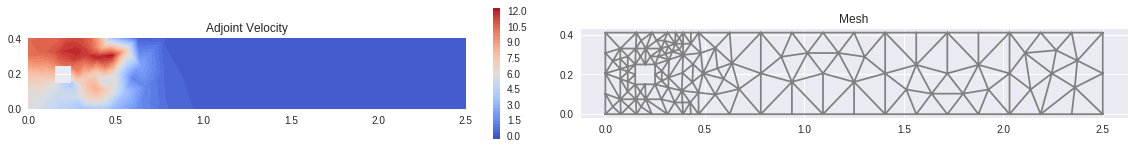

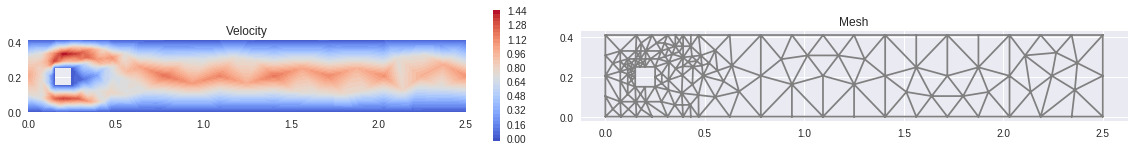

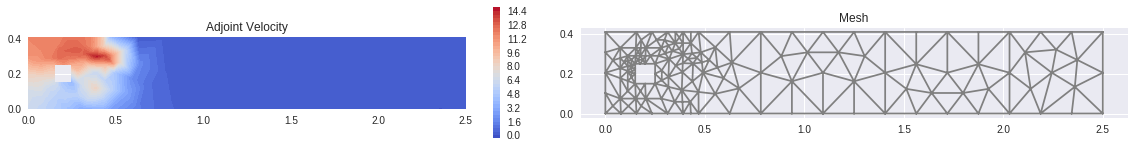

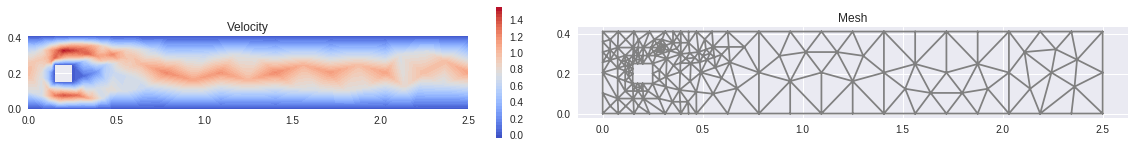

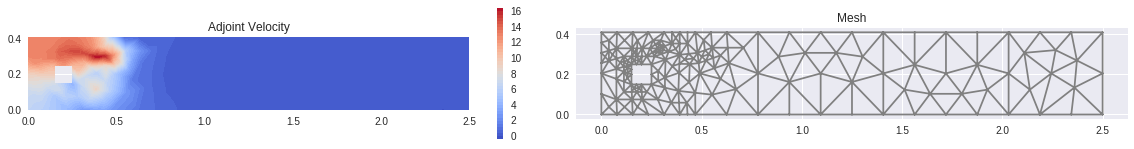

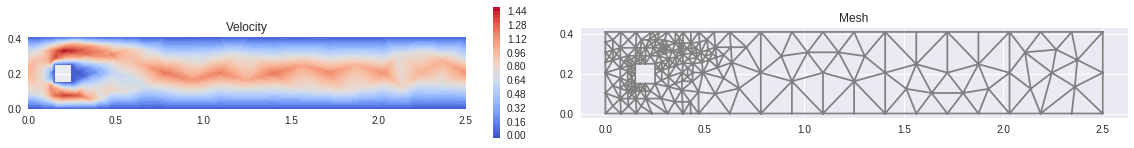

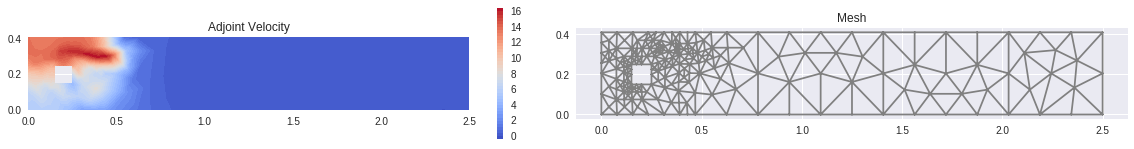

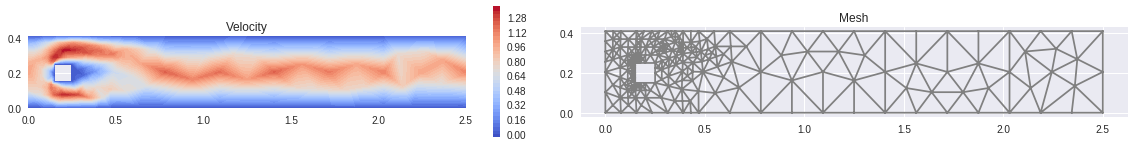

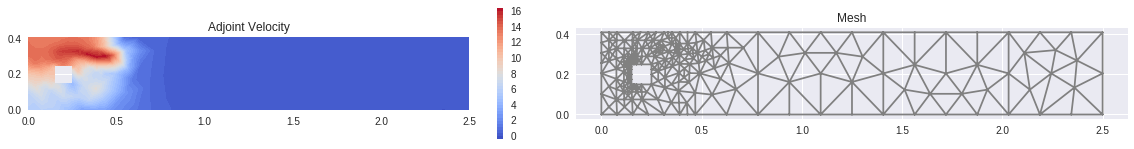

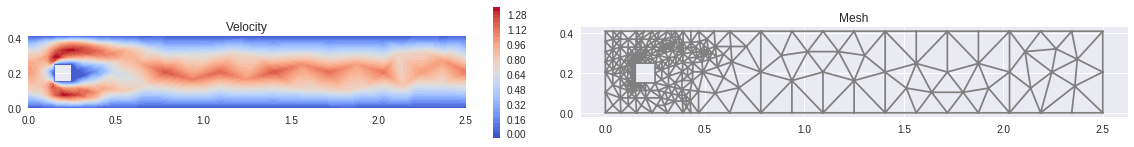

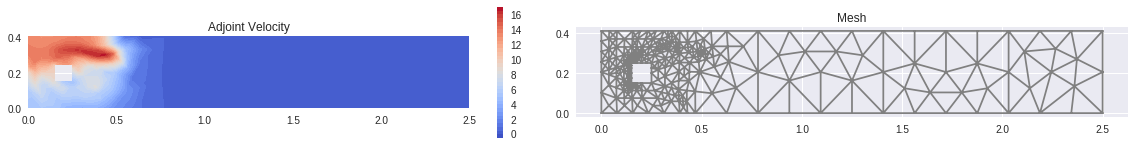

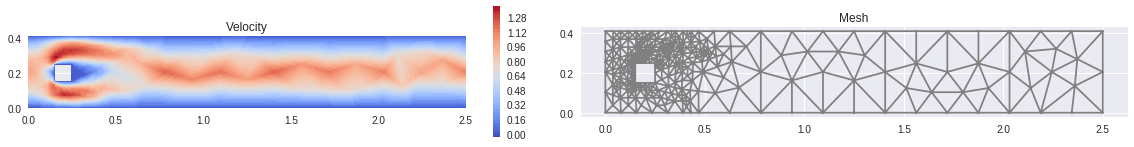

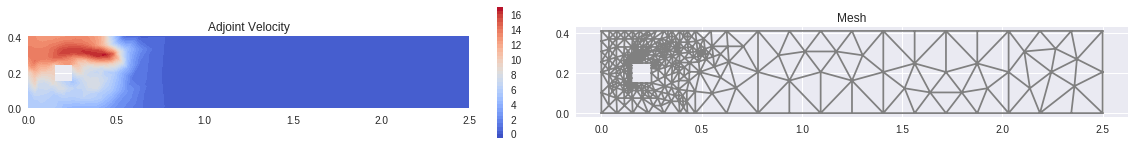

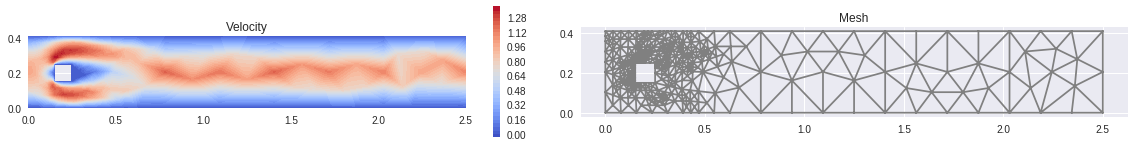

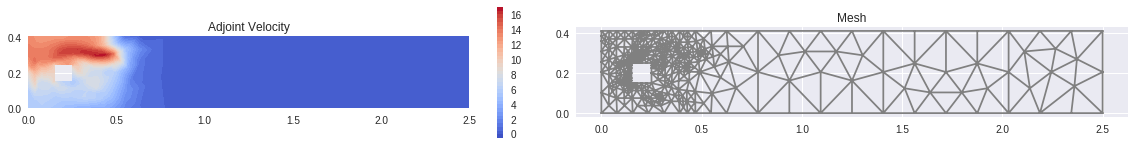

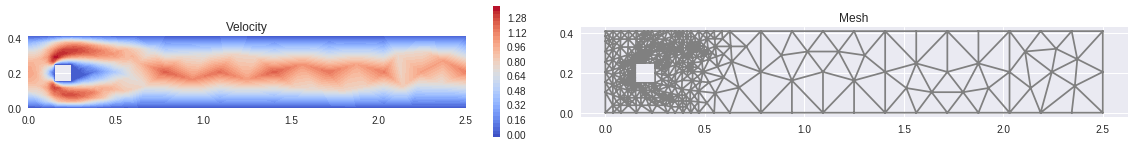

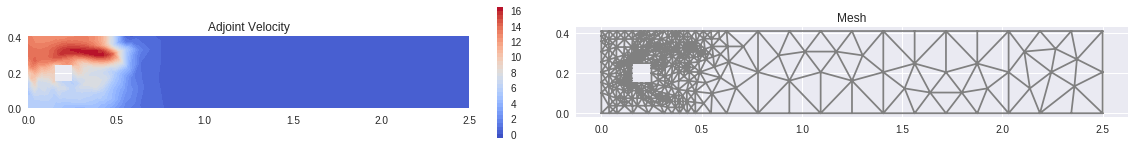

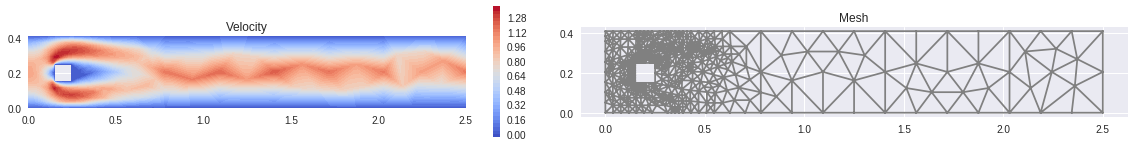

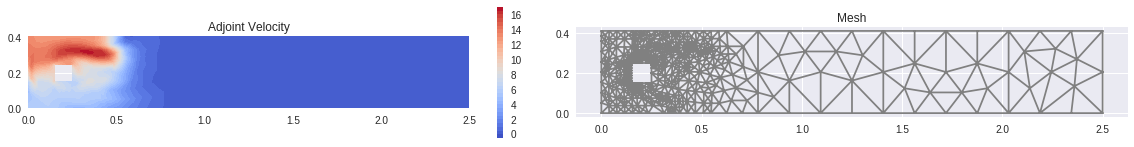

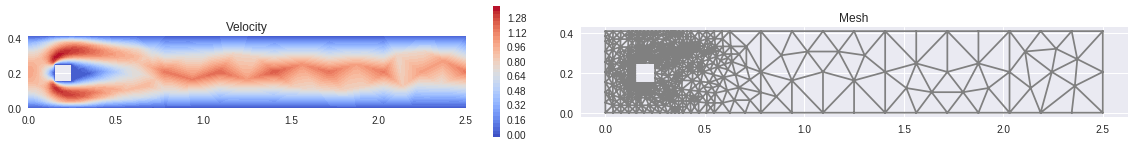

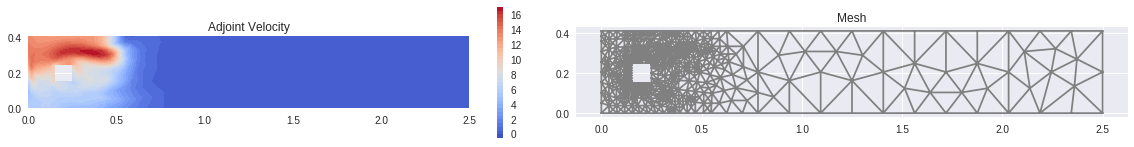

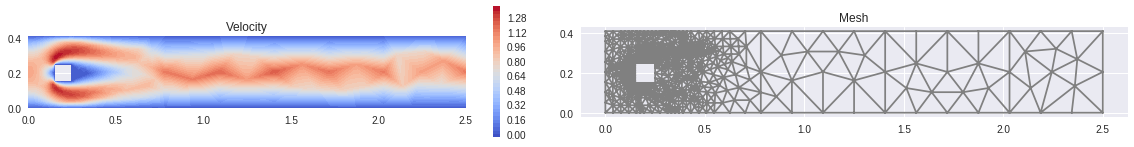

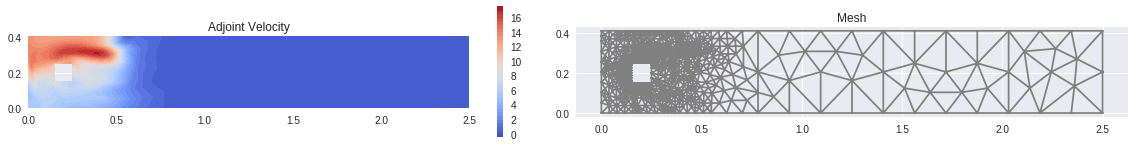

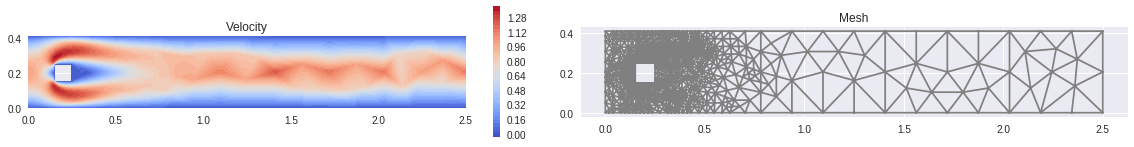

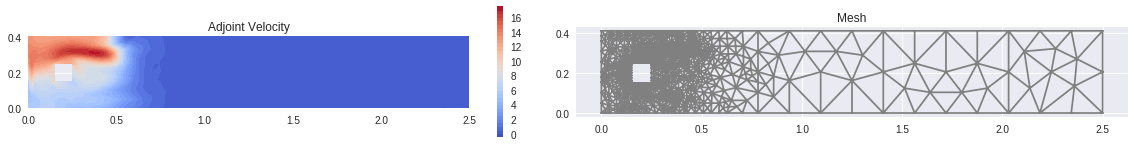

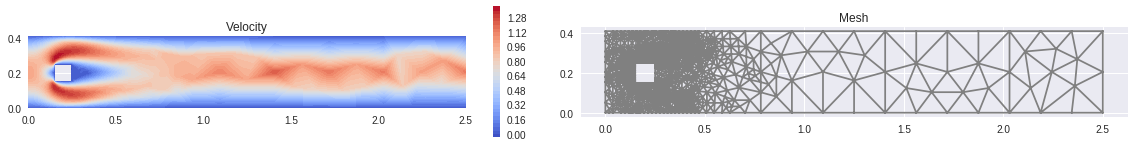

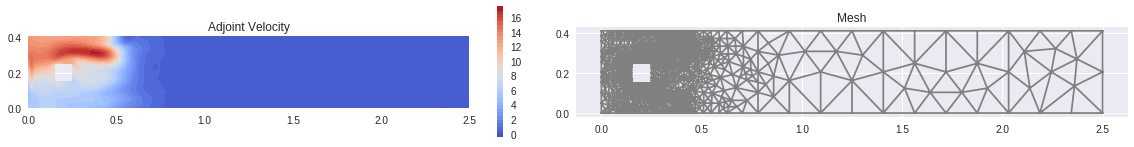

In [49]:
# Copyright (c) 2017-2018 Johan Jansson, Cem Degirmenci

XMIN = 0.; XMAX = 2.5; YMIN = 0; YMAX = 0.41; G = [XMIN, XMAX, YMIN, YMAX]; eps = 1e-5; mresolution=10 # Geometry and mesh
ghole = [0.15, 0.25, 0.15, 0.25];
mesh = generate_mesh(Rectangle(Point(G[0], G[2]), Point(G[1], G[3])) - Rectangle(Point(ghole[0],ghole[2]),Point(ghole[1],ghole[3]) ), mresolution)

def M(mesh, u, p):
  """Output functional"""
  def epsilon(z):
    return 0.5*(grad(z) + grad(z).T)

  n = FacetNormal(mesh)

  I = Identity(2)
  sigma = p*I - 2*nu*epsilon(u)
  theta = Constant((1.0, 0.0))

  g = Expression(("200.0*exp(-200.0*(pow(x[0] - 0.5, 2) + pow(x[1] - 0.3, 2)))", "0.0"), degree=2)

  M1 = psimarker*p*n[0]*ds # Drag (only pressure)
  M2 = psimarker*p*n[1]*ds # Lift (only pressure)
  M3 = inner(g, u)*dx # Mean of the velocity in a region
  M4 = psimarker*dot(dot(sigma, n), theta)*ds # Drag (full stress)
  M5 = u[0]*dx # Mean of the x-velocity in the whole domain

  return M1

ref = 0.128069

nu = 4e-3; # Viscosity
adaptive = True; adapt_ratio = 0.03; maxiters = 20

clear_output();
for i in range(0, maxiters):
  # Declare FE spaces                                                                                                              
  VE = VectorElement("CG", mesh.ufl_cell(), 1); QE = FiniteElement("CG", mesh.ufl_cell(), 1); h = CellDiameter(mesh); # FEM functions
  WE = VE * QE; W = FunctionSpace(mesh, WE); V = FunctionSpace(mesh, VE); Q = FunctionSpace(mesh, QE) # Make a mixed space
  wt = TestFunction(W); (v, q) = (as_vector((wt[0], wt[1])), wt[2]);
  w = Function(W); (u, p) = (as_vector((w[0], w[1])), w[2]); u0 = Function(V)
  phi = Function(W); (phi_u, phi_p) = (as_vector((phi[0], phi[1])), phi[2]);
  w_ = TrialFunction(W)

  ZE = FiniteElement("DG", mesh.ufl_cell(), 0)
  Z = FunctionSpace(mesh, ZE)
  z = TestFunction(Z)
  
  uin = Expression(("4*(x[1]*(YMAX-x[1]))/(YMAX*YMAX)", "0."), YMAX=YMAX, element = V.ufl_element()) # Inflow velocity
  om = Expression("x[0] > XMAX - eps ? 1. : 0.", XMAX=XMAX, eps=eps, element = Q.ufl_element()) # Mark regions for boundary conditions
  im = Expression("x[0] < XMIN + eps ? 1. : 0.", XMIN=XMIN, eps=eps, element = Q.ufl_element())
  nm = Expression("x[0] > XMIN + eps && x[0] < XMAX - eps ? 1. : 0.", XMIN=XMIN, XMAX=XMAX, eps=eps, element = Q.ufl_element())
  psimarker = Expression("x[0] > XMIN + eps && x[1] >  YMIN + eps && x[0] < XMAX - eps && x[1] < YMAX - eps ? 1. : 0.",
                         XMIN=XMIN, XMAX=XMAX, YMIN=YMIN, YMAX=YMAX, eps=eps, element = Q.ufl_element())

  n = FacetNormal(mesh)
  d = .5*h; # Stabilization parameter
  gamma = 10*1./h # Penalty parameter

  r = ((inner(grad(p) + grad(u)*u, v) + nu*inner(grad(u), grad(v)) + div(u)*q)*dx +
       gamma*(om*p*q + im*inner(u - uin, v) + nm*inner(u, v))*ds + # Weak boundary conditions
      d*(inner(grad(p) + grad(u)*u, grad(q) + grad(u)*v) + inner(div(u), div(v)))*dx) # Stabilization
  solve(r==0, w)  # Solve the Navier-Stokes PDE (stationary)
  plot_compact_static(u, Q, "Velocity") # Plot all quantities (see implementation above)

  output = assemble(M(mesh, u, p))
  print("adaptive iter: %d num_vertices: %d output: %f err: %f" % (i, mesh.num_vertices(), output, abs(ref - output)))

  a_dual = adjoint(derivative(r, w)) # Construct the adjoint problem
  L_dual = M(mesh, v, q)               
  solve(a_dual==L_dual, phi)  # Solve the adjoint Navier-Stokes PDE (stationary)
  
  plot_compact_static(phi, Q, "Adjoint Velocity") # Plot all quantities (see implementation above)

  Lei = replace(r, {wt:phi*z}); # Construct error indicators
  ei = assemble(Lei);
  gamma = abs(ei.get_local()) # Get value array (assume serial implementation)

  # Mark cells for refinement
  cell_markers = MeshFunction("bool", mesh, mesh.topology().dim())
  gamma_0 = sorted(gamma, reverse=True)[int(len(gamma)*adapt_ratio) - 1]
  for c in cells(mesh):
      cell_markers[c] = gamma[c.index()] > gamma_0

  if adaptive: # Refine mesh
      rmesh = refine(mesh, cell_markers)
  else:
      rmesh = refine(mesh)
  mesh = rmesh # Shift to next adaptive iteration